# Contexto do Problema

Utilizar o aprendizado de máquina para a predição do valor de um imóvel.

Link do Arquivo CSV <br>
https://www.kaggle.com/datasets/camnugent/california-housing-prices
<br><br>
**Sobre o conjunto de Dados**, este "DataSet" será útil como introdução à implementação de algoritmos de aprendizado de Máquina.

O uso deste "Dataset" requer limpeza rudimentar de dados, tem pista de atributos facilmente compreensíveis e possui um tamanho ótimo entre ser muito pequeno e muito grande.

Os dados contém informações do Censo da California de 1990. Portanto não são úteis para previsão dos preços atuais.

Porém, fornece um conjunto de dados útil o suficiente para aprendermos os fundamentos do aprendizado de máquina.

Os dados não são totalmente adequados, então há algumas etpas de pré processamento.

\# **1. Importação de Base e de Bibliotecas**

In [ ]:
# importando bibliotecas
import pandas as pd
import os as os

In [ ]:
# Criar Dataframe
df = pd.read_csv("housing.csv")

# **2. Pequena Ánalise Exploratória de Dados (EDA)**

Não há forma definitiva de realizar esta análise.

O objetivo é se maximizar o máximo possível com esses dados.

Segue algumas orientações.

## 2.1 Estrutura de dados e Visualização de Algumas instâncias

In [1]:
# Imprimir DataFrame
# print(df)
df

NameError: name 'df' is not defined

Outra forma de visualizar é com o método head() do DataFrame

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


Podemos utilizar também o método info() do DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## **2.2 Histogramas**

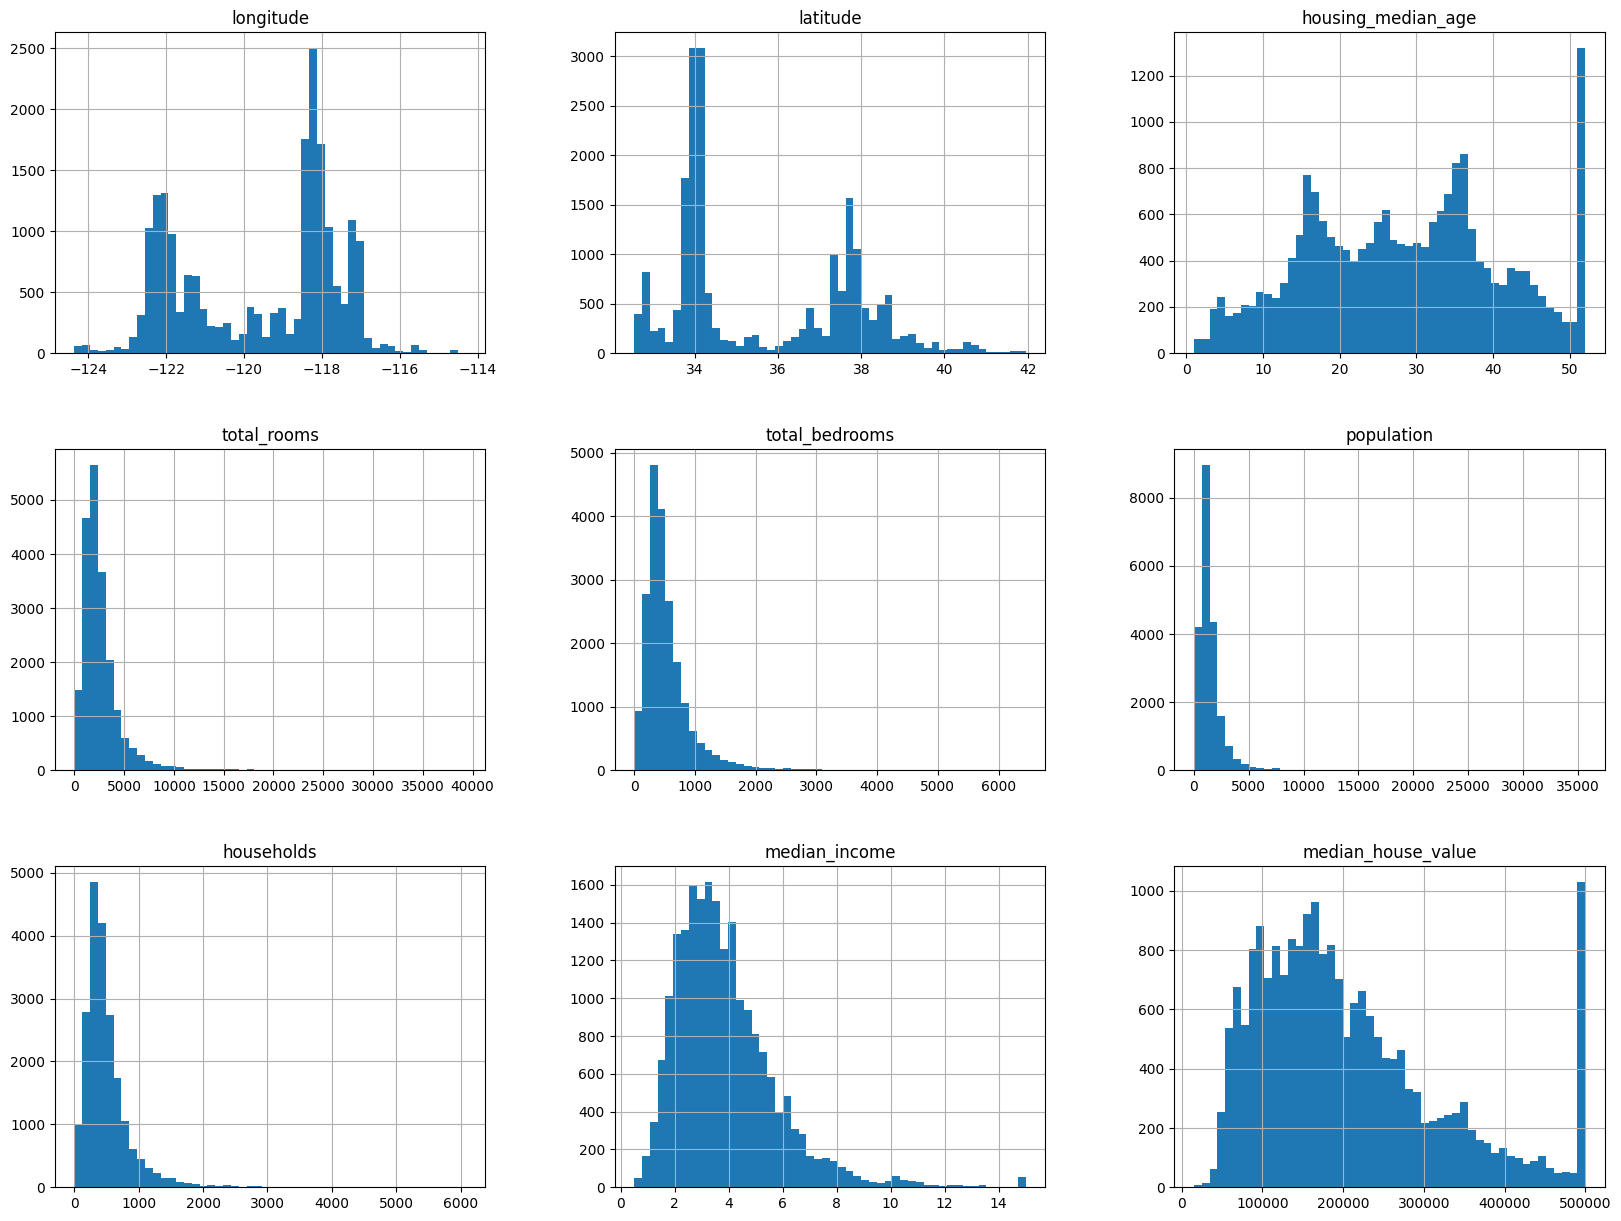

In [ ]:
# Importar Biblioteca Gráfica
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## 2.3 Outras informações Coletadas do "DataFrame"

### ***2.3.1 Visualização de Valores Faltantes***

*   *Item da lista*
*   Item da lista



In [ ]:
# Verificar Dados Nulos no DataFrame
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


<Axes: >

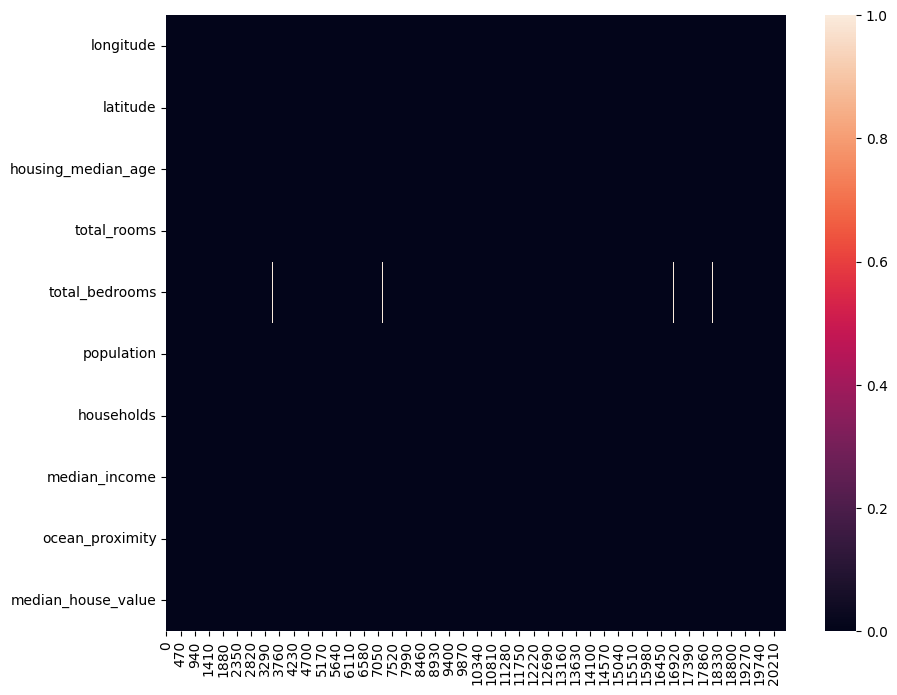

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.isna().transpose())





```
# Isto está formatado como código
```

#### 2.3.2 Impacto da coluna "total_bedrooms"


**Tratamento com Dados Faltantes**<br>


Possui 20.433 não nulos do total de 20.640


A presença de valores vazios em um DataFrame é um problema comum na análise de dados.


É importante entender as implicações desses valores e escolher a estratégia de tratamento mais adequada para cada caso.<br>
A escolha da estratégia dependerá de diversos fatores, como:<br>
a) a quantidade de valores faltantes,<br>
b) a importância da variável e<br>
c) o algoritmo de machine learning que será utilizado.


**Impactos**<br>
a) Dificuldade na aplicação de algoritmos:
Muitos algoritmos de machine learning não conseguem lidar com valores faltantes. É necessário pré-processar os dados para tratar esses valores antes de aplicar o modelo.<br><br>
b) Viés nos resultados:
Se os valores vazios não forem tratados adequadamente, podem introduzir vieses nos resultados da análise.<br>
Por exemplo, ao analisar um conjunto de dados de casas para entender a relação entre o número de quartos (total_bedrooms) e o preço. i) Se as casas que não informam o número de quartos forem, por exemplo, casas mais antigas, localizadas em regiões mais rurais e com um valor médio menor, ao simplesmente excluir essas casas ou preencher os valores faltantes com
a média, você estará introduzindo um viés em sua análise.<br><br>
c) Perda de informações:
Cada valor faltante representa uma informação perdida sobre a observação. A perda de muitas informações pode prejudicar a qualidade do modelo e a capacidade de generalização.<br><br>
d) Decisões incorretas:
Se os valores vazios não forem tratados adequadamente, podem levar a decisões incorretas com base nos dados. Por exemplo, se um modelo de predição de preços de imóveis não considerar os valores faltantes para "total_bedrooms", pode superestimar ou subestimar o preço de imóveis com um número desconhecido de quartos.

** **negrito**_Eliminando instância com dados faltantes é uma opção_**

In [ ]:
#Utilizar a Função dropna() do Pandas
df_sem_dados_faltantes = df.dropna()

#Verificar quantidade de dados nulos no DataSet
df_sem_dados_faltantes.sum().isnull()


,0
longitude,False
latitude,False
housing_median_age,False
total_rooms,False
total_bedrooms,False
population,False
households,False
median_income,False
ocean_proximity,False
median_house_value,False


**_Eliminando colunas com dados faltantes_**

> Adicionar aspas



In [ ]:
#Verificar quantidade de dados nulos no DataSet
df_sem_colunas = df.drop("total_bedrooms",axis=1)
df_sem_colunas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   population          20640 non-null  int64  
 5   households          20640 non-null  int64  
 6   median_income       20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
 8   median_house_value  20640 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 1.4+ MB


### ***2.3.3 Tipos de dados Específicos no Pandas***

A biblioteca Pandas permite que cada coluna de um Dataframe tenha um tipo de dado específico.<br>
Isso significa que uma coluna pode conter inteiros (int), números de ponto flutuante (float), string (object), datas (datetime) e outros. <br>

**Conversão Implícita**<br>
Embora a Pandas possa realizar conversões implícitas em alguns casos, como quando realiza operações matemáticas em colunas que contém apenas números, o tipo de dado de uma coluna é definido no momento da criação do DataFrame e não muda automaticamente.

**O tipo "object"**
O tipo 'object' em um Dataframe geralmente indica uma coluna que contém uma mistura de tipos, como "strin" e números.<br>
No entanto, isso significa que todos os dados são 'string'.



In [ ]:
#Explorando os dados do atributo "ocean_proximity"
ocean_values = df.ocean_proximity.value_counts()
#O comando acima conta a frequência de cada categoria presente no atributo "ocean_proximity" do DataFrame df.
#Retorna uma série do Pandas, onde o Índice representa as categorias e os valores correspondentes.
print(ocean_values)


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


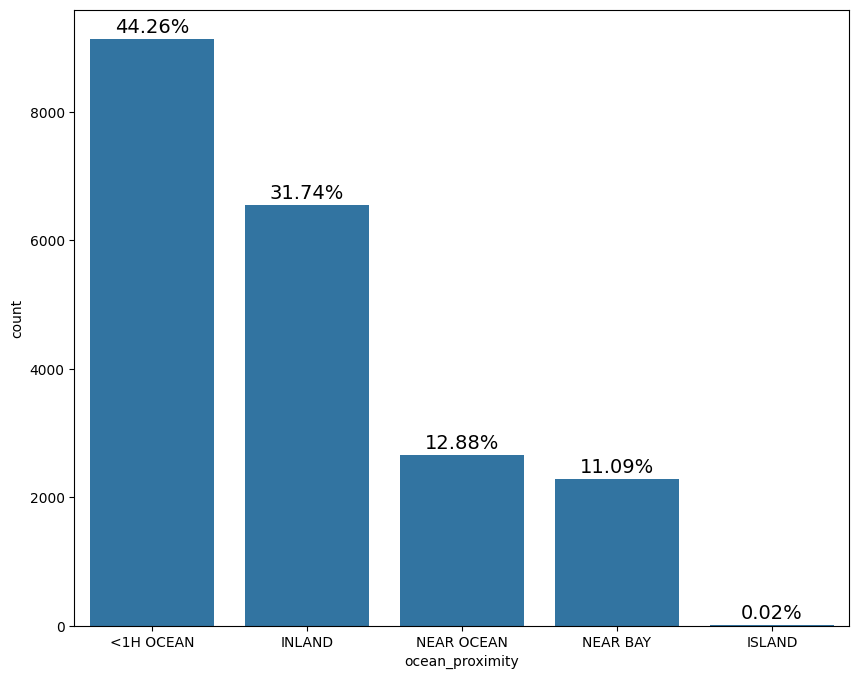

In [ ]:
# Explorando mais o atributo "ocean_proximity"
plt.figure(figsize=(10,8))
sns.countplot(x="ocean_proximity", data=df, order=ocean_values.index)

, data=df, order-ocean_values.index)
# O parâmetro: "order=ocean_values.index" indica a ordem de apresentação dos nomes associativos da série.

# Aplicando uma porcentagem acima de cada barra do gráfico
for i in range(ocean_values.shape[0]):
  count = ocean_values.iloc[i]
  str='{:0.2f}%'.format(100*count / df.shape[0])
  plt.text(i,count+100,str,ha='center', color='black', fontsize=14)

# 2.3.4 Informações Estatisticas

*   Item da lista
*   Item da lista *texto em itálico*



In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 2.3.4.1 Por que o std(Desvio Padrão) é importante

:Porque demonstra a variabilidade dos atributos.
A linha **std** Mostra o desvio padrão, que mede a dispersão dos valores.

**A) Alta variabilidade:** Atributos com alto valor de desvio padrão indicam uma grande dispersão nos atributos. Por exemplo, se o atributo "median_house_value" tiver um desvio padrão alto, significa que aos preços das casas variam muito no conjunto de dados.

**B) Identificação de "outliers":** Um desvio padrão muito alto pode indicar a presença de "outliers", que são os valores extremos que podem distorcer a analise dos dados.

**C) Comparação entre atributos:** Ao comparar o desvio o padrão de diferentes atributos, podemos identificar quais atributos apresentam maior variabilidade e quais são mais homogeneos.

# 2.3.4.2 Normalidade dos dados

Se a distribuição dos dados for aproximadamente normal, podemos usar a regra dos 68-95-99, 7, para fazer inferencias sobre os dados. para saber isto podemos utilizar as seguintes técnicas visuais:

**A) Histograma** É uma forma mais simples de visualizar distribuição dos dados.

**B) Box plot** Um "Box plot" mostra a distribuição de dados através de quartis, indentificando "outliers" e assimetria da distribuição.

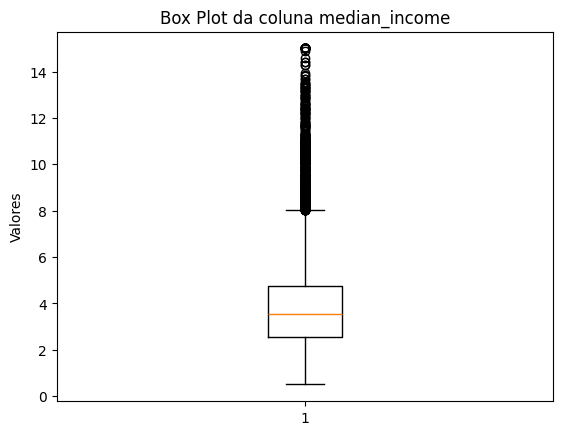

In [ ]:
# Criar um gráfico "Box plot" para uma coluna especifica.
plt.boxplot(df['median_income'])
plt.title('Box Plot da coluna median_income')
plt.ylabel('Valores')
plt.show()

[texto do link](https://)# **3. Criar um Conjunto de Dados**

O Scilkit-Learn oferece algumas funções para dividir um conjunto de dados em vários subconjunto de dados em vários subconjuntos de dados de diversas maneiras.

*texto em itálico*# 3.1 Separando um conjunto de dados de Teste (de forma aleatória)

In [ ]:
# A função mais simples
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

**Para** visualizar esses dados. (Geron, 2017 p.53)

In [ ]:
len(train_set), len(test_set)

(16512, 4128)

**A** aleatoriedade na divisão dos dados é um principio importante. Porém, se há desbalanceamento nos dados essa aleatoridade pode agravar o problema.



```
# Isto está formatado como código
```

# **3.2 Refazendo o conjunto de teste (de forma estratificada)**

Isto significa refazer a divisão, porém, agora de forma estratificada as classes de dados.

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

# Criando a coluna de vendas com faixas ajustadas
df['income_cat'] = pd.cut(df['median_plataform'],
                           bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                           labels=[1, 2, 3, 4, 5])

# Certifica a contagem de amostra em cada classe
print (df['income_cat'].value_counts())

# Divisão estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]


income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


Explorar a nova coluna "income_cat"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  object  
 9   median_house_value  20640 non-null  int64   
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,5
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,5
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,5
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,4
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,3


# **5. Treinando o Modelo**

> Adicionar aspas



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
#df.info()

In [ ]:
#df = pd.get_dummies(df, columns=['ocean_proximity'])

X = df.drop('median_house_value', axis=1)
y = df['median_house_value'],
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_teste)

dic_modelos = {
    "ElasticNet": ElasticNet(),
    "RandomForestR": RandomForestRegressor(),
}

def fit_and_score(dic_modelos, X_train, X_test, y_train, y_test):
  model_scores = {}
  for name, model in dic_modelos.items():
      model.fit(X_train, y_test)
      y_pred = model.predict(X_test)
      model_scores[name] = mean_squared_error(y_test, y_pred)
  return model_scores

resultado = fit_and_score(dic_modelos, X_train, X_test, y_train, y_test)
print(resultado)

ValueError: Found input variables with inconsistent numbers of samples: [20640, 1]

In [ ]:
for nome_modelo, mse in resultado.items():
    rmse = np.sqrt(mse)
    rsmse_resultados[nome_modelo] = rmse

